In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LogNorm
from scipy.integrate import quad
from scipy.special import gamma
import math
import cmath
import scipy.special

In [2]:
def knum(mbh, gamma, g):
    numerator = 1 / np.sqrt((mbh / (30 * 1.989 * 10**33)) * (0.2 / gamma) * (10.75 / g) ** (-1/6) * (2.9 * 10**5)**-2)
    return numerator

In [3]:
def alpha(g, h, eta_c,k, kc):
    term1 = ((1j * (g**2 * (h + 6) + eta_c)) / (4 * g * (k/kc)**3))
    term2 = ((1j * (g**2 * (h + 4) + 2 + eta_c)) / (4 * g * (k/kc)))
    term3 = (g**2 + 1) / (2 * g)
    
    return term1 + term2 + term3

def beta(g, h, eta_c,k, kc):
    term1 = (-(1j * (g**2 * (h + 6) + eta_c) * np.exp(-2j * (k/kc))) / (4 * g * (k/kc)**3))
    term2 = (((g**2 * (h + 6) + eta_c) * np.exp(-2j * (k/kc))) / (2 * g * (k/kc)**2))
    term3 = ((1j * (g**2 * (h + 8) + eta_c - 2) * np.exp(-2j * (k/kc))) / (4 * g * (k/kc)))
    term4 = ((g**2 - 1) * np.exp(-2j * (k/kc))) / (2 * g)
    
    return term1 + term2 + term3 - term4



def P(g, h, eta_c, k,kc, H, epsilon_k):
    alpha_val = alpha(g, h, eta_c, k,kc)
    beta_val = beta(g, h, eta_c, k,kc)
    
    term1 = (H**2) / (8 * np.pi**2 * epsilon_k)
    term2 = (alpha_val + beta_val) * (np.conjugate(alpha_val + beta_val))
    
    return term1 * term2

In [4]:
def Omega(sigma_r, h):
    return np.sqrt(2 * np.pi * sigma_r**2) * (1 + scipy.special.erf(1 / (np.abs(h) * np.sqrt(2 * sigma_r**2))))

def BetaNG1(sigma_r, h, Rc):
    omega = Omega(sigma_r, h)
    return (np.sqrt(2 * np.pi * sigma_r**2) / omega) * (scipy.special.erf(1 / (np.abs(h) * np.sqrt(2 * sigma_r**2))) - scipy.special.erf((Rc * (4 - np.abs(h) * Rc)) / (4 * np.sqrt(2 * sigma_r**2)))) * (np.where((2 / np.abs(h)) > Rc, 1, 0))

def BetaG(sigma_r, Rc):
    return 0.5 * (1 - scipy.special.erf(Rc / np.sqrt(2 * sigma_r**2)))

def ku(mbh, gamma, g1):
    return np.sqrt((gamma * g1**(-1/6)) / (1.3779507430024212e-47 * mbh))

def dat1(g, h, eta_c, kc, mbh, H, epsilon_k, gamma,g1):
    # Compute k using the ku function
    k = ku(mbh, gamma, g1)
    
    # Compute the value of P using the provided function P
    p = P(g, h, eta_c, k,kc, H, epsilon_k)
    
    # Compute dat1 using the formula
    return (4/9) * np.sqrt(p)

def BetaRatio(g, h, eta_c,kc, mbh, H, epsilon_k, gamma,g1,Rc):
    SigmaR=dat1(g, h, eta_c,kc, mbh, H, epsilon_k, gamma,g1)
    return BetaNG1(SigmaR, h, Rc)/BetaG(SigmaR, Rc)

def fpbh(m):
    return (1.70983e+25/np.sqrt(m))

def fpbh1(g, h, eta_c,kc, mbh, H, epsilon_k, gamma,g1,Rc):
    SigmaR=dat1(g, h, eta_c,kc, mbh, H, epsilon_k, gamma,g1)
    return BetaNG1(SigmaR, h, Rc)*(1.70983e+25/np.sqrt(mbh))
    
    

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<Figure size 648x432 with 0 Axes>

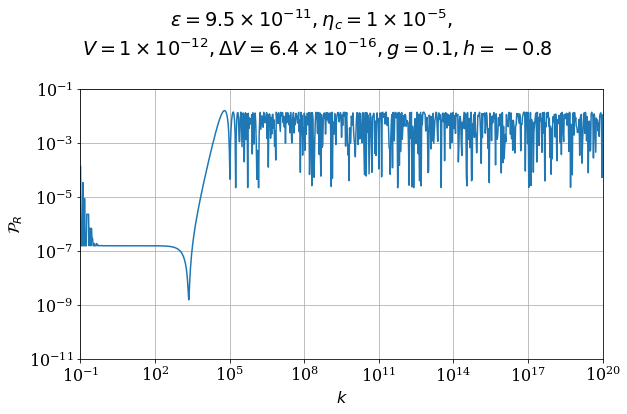

In [5]:
font = {'family': 'serif', 'size': 16}
plt.rc('font', **font)
plt.figure(figsize=(9,6))

k_values = np.logspace(-3, 20, 1000)
k_values1 = np.logspace(-3, 20, 1000)
H_value = np.sqrt((1e-13 + 6.4e-18) * (1 / 3))
eta_value= 1.5e-3
#####
mpbht = 1e37
kc=knum(mpbht, 0.2, 9.60)
#####

font = {'family': 'serif', 'size': 16}
plt.rc('font', **font)
plt.figure(figsize=(9,6))
#plt.scatter([0.01], [2.1e-9], color='blue', marker='*', s=200)

#plt.plot(k_values,P(0.11, -0.07, -eta_value, k_values/1, H_value, 3.42695e-7),label='g=0.11,h=-0.07,$\epsilon=3.43\\times 10^{-7}$')
plt.plot(k_values,P(0.2, -0.47, -eta_value, k_values, kc, H_value, 7.5e-13))

#plt.plot(k_values,P(0.14, -0.07, -eta_value, k_values, H_value, 1.2689610031679235e-07),label='g=0.56,h=-0.07')

#plt.plot(k_values,P(1, -0.64, -eta_value, k_values, H_value, 0.0000286777),label='g=1,h=-0.64, $\epsilon=0.0000286777$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$')
plt.ylabel(r'$\mathcal{P}_R$')
plt.xlim(0.1,1e20)
plt.ylim(1e-11,1e-1)
#plt.legend()
plt.grid()

plt.suptitle("$\epsilon=9.5\\times10^{-11},\eta_c=1\\times10^{-5},$ \n $ V=1\\times10^{-12},\Delta V=6.4\\times10^{-16},g=0.1,h=-0.8$",y=0.965)
plt.tight_layout()
#plt.savefig('/docker_workplace/Power_spectra.pdf')
plt.show()

In [6]:
H_value = np.sqrt((7e-10 + 6.4e-15) * (1 / 3))
k_value = 1e1
mpbht = 1e37
kc=knum(mpbht, 0.2, 9.60)
g0=0.028
h1= -0.47

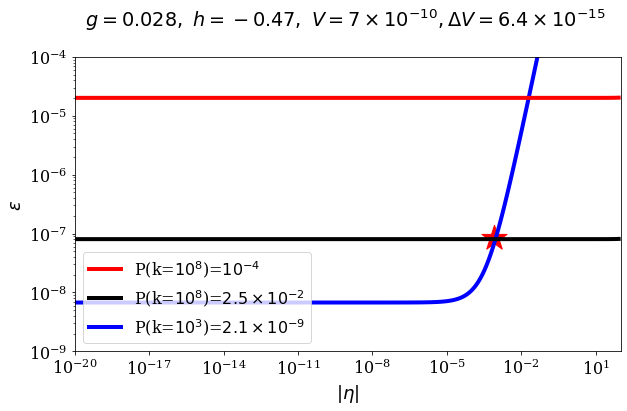

In [7]:
ep_values=np.logspace(-9, -4, 500)
eta_values=np.logspace(-20, 2, 500)

Ep,Eta=np.meshgrid(ep_values, eta_values)

Pr_values = np.abs(P(g0, h1, -Eta, k_value, kc, H_value, Ep))
Pr_values1 = np.abs(P(g0, h1, -Eta, 1e7, kc, H_value, Ep))

plt.figure(figsize=(9, 6))



C1 = plt.contour(Eta, Ep, Pr_values, levels=[2.1e-9], colors=['blue'],linewidths=4)
C2 = plt.contour(Eta, Ep, Pr_values1, levels=[1e-4, 2.5e-2], colors=['r','black'],linewidths=4)

plt.scatter([8e-4], [8.5e-8], color='r', marker='*', s=700)

plt.xlabel(r'$|\eta|$',fontsize=18)
plt.ylabel(r'$\epsilon$',fontsize=18)
plt.xscale('log')
plt.yscale('log')

custom_legend_labels = {'P(k=$10^{8}$)=$10^{-4}$': 'r', 'P(k=$10^{8}$)=$2.5\\times 10^{-2}$': 'black', 'P(k=$10^{3}$)=$2.1\\times 10^{-9}$': 'blue'}

# Create legend handles and labels
legend_handles = [plt.Line2D([0], [0], color=value, linewidth=4) for value in custom_legend_labels.values()]
legend_labels = custom_legend_labels.keys()

plt.legend(legend_handles, legend_labels,loc='lower left')
plt.suptitle("$~~~~~~~~~~g=0.028,~h=-0.47,~V=7\\times10^{-10},\Delta V=6.4\\times10^{-15}$",y=0.96)

plt.tight_layout()

#plt.savefig('Ps_New_Sol.pdf')
plt.show()




<ipython-input-4-3cb68f95e728>:26: RuntimeWarning: divide by zero encountered in true_divide
  return BetaNG1(SigmaR, h, Rc)/BetaG(SigmaR, Rc)
<ipython-input-4-3cb68f95e728>:26: RuntimeWarning: invalid value encountered in true_divide
  return BetaNG1(SigmaR, h, Rc)/BetaG(SigmaR, Rc)
/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2794: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


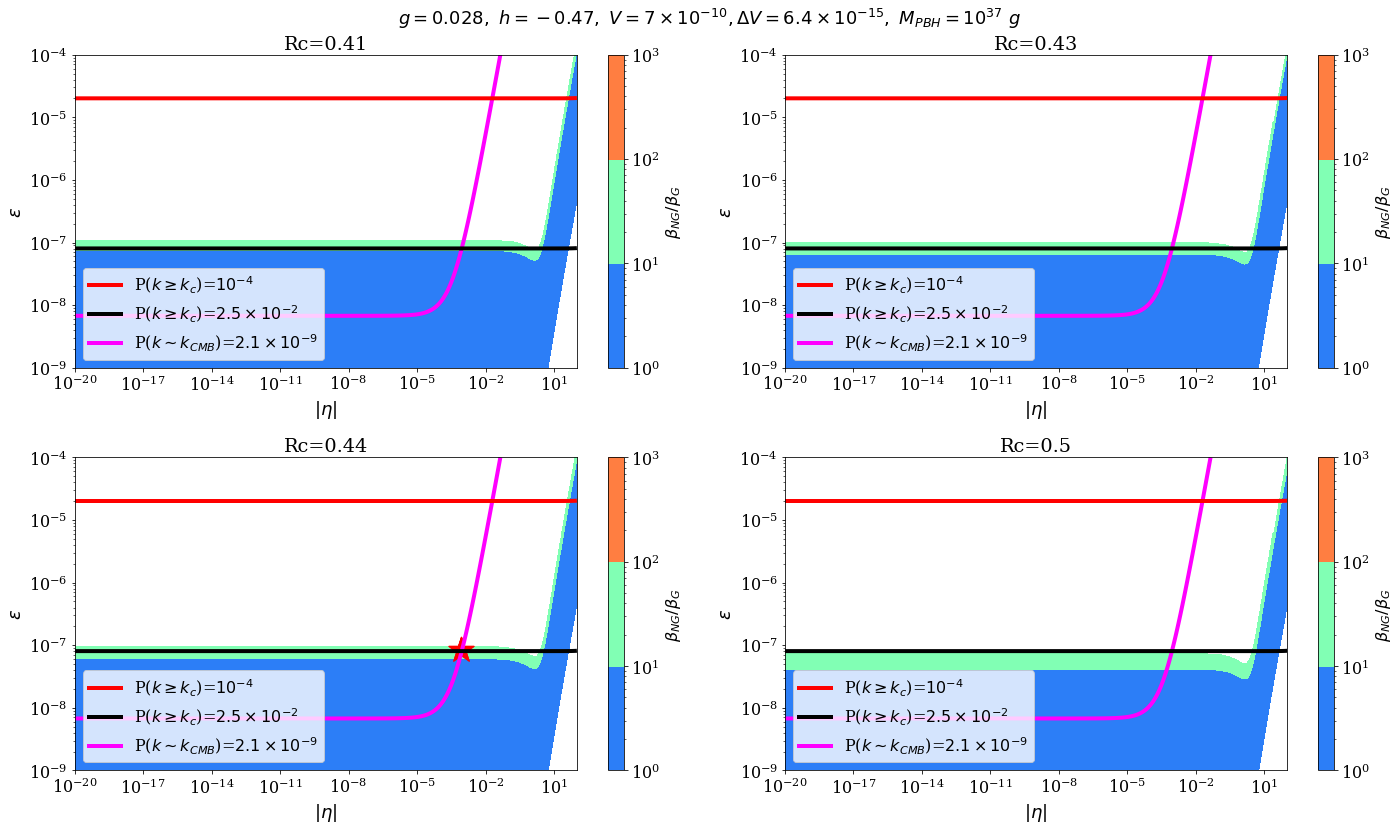

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors


font = {'family': 'serif', 'size': 16}
plt.rc('font', **font)
R_values = [0.41,0.43,0.44,0.5]
# Create subplot grid
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
#l=np.logspace(0, 2, num=5)
l=np.array([1,10,100,1000])
for i, R in enumerate(R_values):
    # Calculate BetaRatio for each R value
    B = BetaRatio(g0, h1, -Eta,kc, mpbht, H_value, Ep, 0.2, 3.94, R)
    
    # Plot contour plot for the current R value
    contour_plot = axs[i // 2, i % 2].contourf(Eta, Ep, B, levels=l, cmap='rainbow',norm=colors.LogNorm())
    axs[i // 2, i % 2].set_xlabel(r'$|\eta|$',fontsize=18)
    axs[i // 2, i % 2].set_ylabel(r'$\epsilon$',fontsize=18)
    axs[i // 2, i % 2].set_xscale('log')
    axs[i // 2, i % 2].set_yscale('log')
    axs[i // 2, i % 2].set_title(f'Rc={R}')
    fig.colorbar(contour_plot, ax=axs[i // 2, i % 2], label='$\\beta_{NG}/\\beta_G$')
    
    # Plot CS1 and CS2 in each subplot
    CS1 = axs[i // 2, i % 2].contour(Eta, Ep, Pr_values, levels=[2.1e-9], colors=['magenta'],linewidths=4)
    CS2 = axs[i // 2, i % 2].contour(Eta, Ep, Pr_values1, levels=[1e-4, 2.5e-2], colors=['r','black'],linewidths=4)
    
    # Define custom legend labels with colors
    custom_legend_labels = {'P($k\geq k_c$)=$10^{-4}$': 'r', 'P($k\geq k_c$)=$2.5\\times 10^{-2}$': 'black', 'P($k\sim k_{CMB}$)=$2.1\\times 10^{-9}$': 'magenta'}


    # Create legend handles and labels
    legend_handles = [plt.Line2D([0], [0], color=value, linewidth=4) for value in custom_legend_labels.values()]
    legend_labels = custom_legend_labels.keys()
    
    # Add legend
    axs[i // 2, i % 2].legend(legend_handles, legend_labels, loc='lower left')
    axs[1,0].scatter([8e-4], [8.5e-8], color='r', marker='*', s=700)

plt.suptitle("$ g=0.028,~h=-0.47,~V=7\\times10^{-10},\Delta V=6.4\\times10^{-15},~M_{PBH}=10^{37}~g$",y=0.965,fontsize=18)

plt.tight_layout()


plt.savefig('PsB_New_Heavy.pdf')
plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


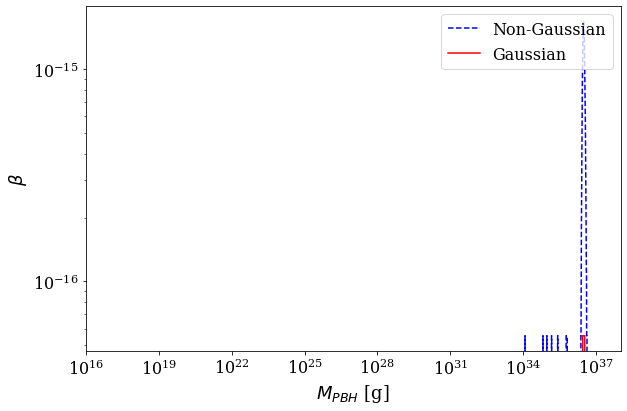

In [58]:
mpbval = np.logspace(16, 49, 5000)

g1=g0
h=-0.47



# Compute the output of dat1 for each value of mpbval
dat1_output = [dat1(g1, h, -8e-4, kc, mbh, H_value, 3e-7, 0.2, 3.94) for mbh in mpbval]

# Compute the output of BetaNG1 using the dat1 output
output = [BetaNG1(sigma_r, h, 0.44) for sigma_r in dat1_output]
outputG = [BetaG(sigma_r, 0.44) for sigma_r in dat1_output]

# Plot
plt.figure(figsize=(9, 6))
plt.plot(mpbval, output, '--', color='b', label="Non-Gaussian")
plt.plot(mpbval, outputG, color='r', label="Gaussian")

plt.xscale('log')
plt.yscale('log')
plt.xlabel('$M_{PBH}$ [g]',fontsize=18)
plt.ylabel('$\\beta$',fontsize=18)
plt.xlim(1e16, 1e38)


# Third legend for Gaussian line
plt.legend(loc='upper right')

plt.tight_layout()
#plt.savefig('B_New.pdf')

plt.show()

/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


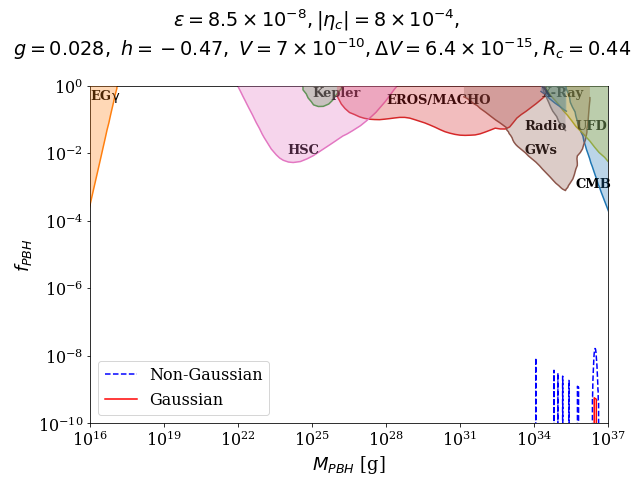

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file paths
file_paths = [
    '/docker_workplace/PBHdata/CMB.csv',
    '/docker_workplace/PBHdata/EGg.csv',
    '/docker_workplace/PBHdata/EROS1.csv',
    '/docker_workplace/PBHdata/EROS2.csv',
    '/docker_workplace/PBHdata/Femto.csv',
    '/docker_workplace/PBHdata/GW.csv',
    '/docker_workplace/PBHdata/HSC.csv',
    '/docker_workplace/PBHdata/Radio.csv',
    '/docker_workplace/PBHdata/UFD.csv',
    '/docker_workplace/PBHdata/WD.csv',
    '/docker_workplace/PBHdata/XRY.csv'
]

# Create a figure and axis
plt.figure(figsize=(9, 7))

# Plot the Non-Gaussian and Gaussian lines first
plt.plot(mpbval, output * fpbh(mpbval), '--', color='b', label="Non-Gaussian")
plt.plot(mpbval, outputG * fpbh(mpbval), color='r', label="Gaussian")


# Plot the data from each file
for file_path in file_paths:
    data = pd.read_csv(file_path, header=None)
    x = data.iloc[:, 0]
    y = data.iloc[:, 1]
    plt.plot(x, y)
    

# Shade the regions
for file_path in file_paths:
    data = pd.read_csv(file_path, header=None)
    x = data.iloc[:, 0]
    y = data.iloc[:, 1]
    plt.fill_between(x, y, 1e10, alpha=0.3, zorder=5)
        

# Set log scale
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$M_{PBH}$ [g]', fontsize=18)
plt.ylabel('$f_{PBH}$', fontsize=18)
plt.xlim(1e16, 1e37)
plt.ylim(1e-10, 1)

# Add legend
plt.legend(loc='lower left')


plt.text(1e16, 4e-1, 'EG$\\rm \\gamma$', fontsize=13, color='black',fontweight='bold')
plt.text(1e24, 1e-2, 'HSC', fontsize=13, color='black',fontweight='bold')
plt.text(1e25, 5e-1, 'Kepler', fontsize=13, color='black',fontweight='bold')
plt.text(1e28, 3e-1, 'EROS/MACHO', fontsize=13, color='black',fontweight='bold')
plt.text(4e33, 1e-2, 'GWs', fontsize=13, color='black',fontweight='bold')
plt.text(5e35, 1e-3, 'CMB', fontsize=13, color='black',fontweight='bold')
plt.text(5e35, 5e-2, 'UFD', fontsize=13, color='black',fontweight='bold')
plt.text(2e34, 5e-1, 'X-Ray', fontsize=13, color='black',fontweight='bold')
plt.text(4e33, 5e-2, 'Radio', fontsize=13, color='black',fontweight='bold')


plt.suptitle("$\epsilon=8.5\\times10^{-8},|\eta_c|=8\\times10^{-4},$ \n $ g=0.028,~h=-0.47,~V=7\\times10^{-10},\Delta V=6.4\\times10^{-15},R_c=0.44$",y=0.965)

# Tight layout for better spacing
plt.tight_layout()
plt.savefig('f_S_Sol.pdf')
# Show the plot
plt.show()


/usr/local/lib/python3.8/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


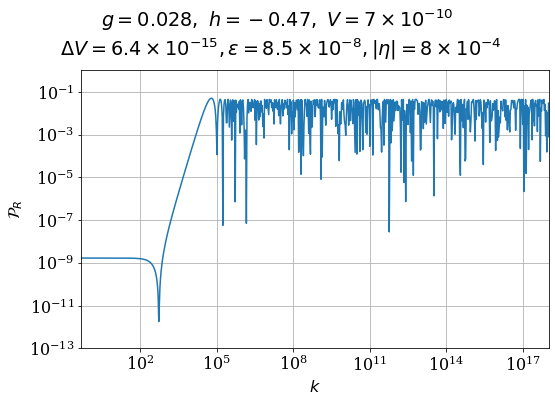

In [68]:
font = {'family': 'serif', 'size': 16}
plt.rc('font', **font)
plt.figure(figsize=(8, 6))
plt.plot(k_values,P(0.028, -0.47, -8e-4, k_values, kc, H_value, 8.5e-8))

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$')
plt.ylabel(r'$\mathcal{P}_R$')
plt.xlim(0.5,1e18)
plt.ylim(1e-13,1)
#plt.legend()
plt.grid()

plt.suptitle("$g=0.028,~h=-0.47,~V=7\\times10^{-10}$ \n $\Delta V=6.4\\times10^{-15},\\epsilon=8.5\\times10^{-8},|\\eta|=8\\times10^{-4}$",y=0.94)
plt.tight_layout()
plt.savefig('Power_spectra_New_Sol.pdf')
plt.show()